# Load dataset

In [1]:
from sklearn.datasets import load_files

path = 'datasets/mathworks/number_data/'
dataset = load_files(path, load_content=False, shuffle=False)

In [2]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

def load_data(dataset):
    images = []
    for file in dataset.filenames:
        img = io.imread(file)
        img = resize(img, (32, 32), anti_aliasing=True)
        gray = rgb2gray(img)
        images.append(gray)
    images = np.array(images)
    n_samples = len(images)
    data = images.reshape((n_samples, -1))
    return data

data = load_data(dataset)

In [3]:

from sklearn.model_selection import train_test_split

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    dataset.target, 
    test_size=0.2, 
    shuffle=True
)

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

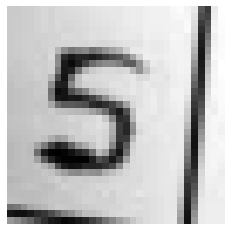

5


In [28]:
import matplotlib.pyplot as plt

some_digit = X_train[4]
some_digit_image = some_digit.reshape(32, 32)

plt.imshow(some_digit_image, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

print(y_train[4])

In [19]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train) # Very long ! (10-20 minutes)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
classifier.predict([some_digit])

array([5], dtype=uint8)

Confusion matrix:
[[960   0   0   0   0   0   0   0   0   0]
 [ 70 824  13  22   1  10   4  26   8   3]
 [ 17 108 681  32  57  32  32  51  10  13]
 [ 20 117  28 585  18  78   9  76  31  19]
 [ 30  66  20   2 681   8  41  39  16  86]
 [ 27  84  24  68  29 600  24  59  49  21]
 [ 25  80  24   6  85  29 705  21  39  40]
 [ 38  90  15  15  34  34   6 698   9  51]
 [ 24  98  26  36  37  61  43  38 585  60]
 [ 40  80   7  24 109  33  19  80  25 602]]


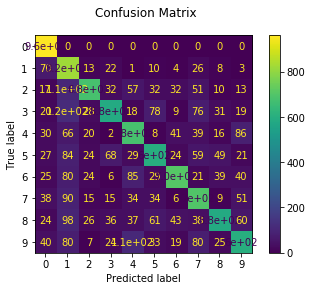

In [31]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [33]:
# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

#images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
#for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#    ax.set_axis_off()
#    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#    ax.set_title('Prediction: %i' % prediction)



NameError: name 'metrics' is not defined

In [34]:
from sklearn.metrics import classification_report
print("Classification report for classifier %s:\n%s\n"
      % (classifier, classification_report(y_test, predicted)))

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       960
           1       0.53      0.84      0.65       981
           2       0.81      0.66      0.73      1033
           3       0.74      0.60      0.66       981
           4       0.65      0.69      0.67       989
           5       0.68      0.61      0.64       985
           6       0.80      0.67      0.73      1054
           7       0.64      0.71      0.67       990
           8       0.76      0.58      0.66      1008
           9       0.67      0.59      0.63      1019

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted

In [35]:
import pickle
# now you can save it to a file
with open('svmmodel.pkl', 'wb') as f:
    pickle.dump(classifier, f)